In [1]:
import torch
import numpy as np
import pandas as pd

# Prva naloga

In [2]:
data = pd.read_csv("okuzeni.csv")
data = data.fillna(0)
data

,braslovče,celje,dobje,dobrna,gornji_grad,kozje,laško,ljubno,luče,mozirje,...,radlje_ob_dravi,ravne_na_koroškem,ribnica_na_pohorju,slovenj_gradec,vuzenica,črna_na_koroškem,hrastnik,litija,trbovlje,zagorje_ob_savi
0,46.0,433.0,11.0,38.0,59.0,16.0,83.0,30.0,17.0,60.0,...,104.0,91.0,12.0,200.0,37.0,33.0,58.0,129.0,78.0,149.0
1,50.0,383.0,5.0,32.0,64.0,15.0,76.0,25.0,18.0,58.0,...,104.0,86.0,13.0,192.0,36.0,34.0,69.0,137.0,80.0,142.0
2,54.0,378.0,6.0,31.0,60.0,14.0,80.0,16.0,16.0,60.0,...,100.0,84.0,12.0,198.0,36.0,31.0,87.0,123.0,101.0,148.0
3,51.0,369.0,6.0,27.0,55.0,14.0,79.0,14.0,15.0,53.0,...,97.0,78.0,12.0,192.0,35.0,31.0,86.0,130.0,96.0,134.0
4,52.0,365.0,7.0,27.0,54.0,14.0,83.0,13.0,13.0,51.0,...,100.0,74.0,11.0,188.0,34.0,27.0,89.0,127.0,115.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,16.0,137.0,6.0,5.0,7.0,6.0,34.0,2.0,3.0,12.0,...,23.0,46.0,4.0,54.0,15.0,5.0,75.0,113.0,50.0,101.0
796,16.0,134.0,6.0,5.0,7.0,6.0,34.0,2.0,3.0,12.0,...,23.0,47.0,4.0,54.0,13.0,5.0,75.0,107.0,49.0,96.0
797,15.0,134.0,6.0,5.0,7.0,6.0,34.0,2.0,3.0,12.0,...,19.0,46.0,4.0,54.0,13.0,5.0,75.0,107.0,49.0,94.0
798,17.0,129.0,7.0,7.0,8.0,6.0,39.0,2.0,3.0,10.0,...,18.0,48.0,3.0,49.0,13.0,5.0,79.0,117.0,56.0,101.0


RNN celica

In [3]:
from torch import nn

In [4]:
X = torch.tensor(data.to_numpy()).float()
cities_count = int(X.shape[1])
datapoints = int(X.shape[0])

In [5]:
X[:, 0] # da prvi stolpec

tensor([ 46.,  50.,  54.,  51.,  52.,  54.,  54.,  49.,  50.,  56.,  56.,  64.,
         64.,  63.,  67.,  73.,  70.,  71.,  72.,  70.,  70.,  72.,  79.,  74.,
         75.,  72.,  73.,  73.,  68.,  58.,  60.,  62.,  60.,  62.,  62.,  61.,
         60.,  61.,  57.,  56.,  56.,  57.,  60.,  63.,  57.,  59.,  56.,  53.,
         53.,  53.,  50.,  53.,  77.,  71.,  70.,  69.,  71.,  73.,  78.,  77.,
         83.,  85.,  85.,  89.,  90.,  87.,  65.,  70.,  70.,  70.,  66.,  62.,
         56.,  52.,  49.,  47.,  47.,  45.,  42.,  43.,  39.,  36.,  37.,  37.,
         33.,  33.,  36.,  34.,  32.,  32.,  32.,  26.,  26.,  24.,  26.,  25.,
         24.,  24.,  23.,  22.,  19.,  21.,  21.,  21.,  21.,  26.,  25.,  21.,
         23.,  24.,  24.,  24.,  30.,  30.,  29.,  26.,  26.,  26.,  26.,  26.,
         23.,  24.,  19.,  19.,  19.,  19.,  17.,  19.,  22.,  23.,  25.,  25.,
         25.,  27.,  29.,  35.,  40.,  47.,  50.,  50.,  54.,  59.,  61.,  67.,
         80.,  80.,  80.,  73.,  79.,  8

In [6]:
class recurrent(nn.Module):
    def __init__(self, input, output, hidden, layers):
        super(recurrent, self).__init__()
        self.input_size = input
        self.output_size = output
        self.hidden_size = hidden
        self.layers = layers

        #self.encoder = nn.Linear(hidden, output)
        self.rnn_cell = nn.RNN(input_size = input, hidden_size = hidden, num_layers = layers)
        self.decoder = nn.Linear(hidden, output)


    def forward(self, x):
        # x is matrix of inputs
        # each cell gets a full pandas row as input
        #print(x.shape)
        output, self.hidden = self.rnn_cell(x)
        #print(output)
        
        output = self.decoder(output[-1, :])
        return output


try in batch and solo (all columns for input, only one column for input)

In [7]:
#n = 20
#model = recurrent(193, 193, 50, n)
#criterion = torch.nn.MSELoss()
#optimiser = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0005)
#
#epochs = 3
#for epoch in range(epochs):
#    print("Epoch ", epoch)
#    for i in range(len(data)-n-2):
#        optimiser.zero_grad()
#        ysr = model(X[i:i+n, :])
#        err = criterion(ysr, X[i+n+1, :])
#        err.backward()
#        optimiser.step()
#
#        if i%100 == 0:
#            print(f'i: {i:03d}, Loss: {err:.4f}')

Epoch  0
i: 000, Loss: 42448.5391
i: 100, Loss: 12043.3809
i: 200, Loss: 1028.1844
i: 300, Loss: 20634.6289
i: 400, Loss: 64069.8750
i: 500, Loss: 43266.1289
i: 600, Loss: 35032.9805
i: 700, Loss: 15756.5664
Epoch  1
i: 000, Loss: 19982.2539
i: 100, Loss: 7687.2744
i: 200, Loss: 7054.0757
i: 300, Loss: 11751.9141
i: 400, Loss: 51934.3867
i: 500, Loss: 33837.5312
i: 600, Loss: 26757.9609
i: 700, Loss: 12110.8564
Epoch  2
i: 000, Loss: 14579.8779
i: 100, Loss: 6614.0435
i: 200, Loss: 10297.6748
i: 300, Loss: 23438.9668
i: 400, Loss: 71975.8281
i: 500, Loss: 47379.5859
i: 600, Loss: 38963.1484
i: 700, Loss: 16992.0566


In [69]:
def generate_problem(X, city, j, batch_size, n, maxwidth = 193):
    # last index available 192. Reserved for data, so i+n = 191
    batch_size = min(batch_size, maxwidth-city-2)
    data = X[j:j+n, city:city+batch_size].view(n,batch_size,1)
    ysr = X[j+n+1, city:city+batch_size].view(batch_size, 1)
    return (data, ysr)

In [70]:
def predict_n(X, city, date, model, n):
    
    predictions = torch.zeros(model.layers+n)
    predictions[0:model.layers] = X[date : date + model.layers, city]
    for i in range(n):
        with torch.no_grad():
            predictions[model.layers + i] = model(predictions[i:i+model.layers].view(model.layers, 1))
    return predictions.detach().numpy()

In [71]:
n = 5
batch_size = 5
# (self, input, output, hidden, layers):
model = recurrent(1, 1, 20, n)
criterion = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0005)
model.train()
epochs = 3
for epoch in range(epochs):
    print("Epoch ", epoch)
    for i in range(0, cities_count, batch_size):
        for j in range(datapoints-n-1):
            data, y_real = generate_problem(X, i, j, batch_size, n)
            optimiser.zero_grad()
            #print(i,j)
            y_pred = model(data)
            u = data

            err = criterion(y_pred, y_real)
            err.backward()
            optimiser.step()
    
            if j%29 == 0:
                print(f'i: {i:03d}, j: {j:03d}, Loss: {err:.4f}, est rea [{float(y_pred[0,0]):.1f} {float(y_real[0,0])}]')

Epoch  0
i: 000, j: 000, Loss: 26375.9590, est rea [0.0 54.0]
i: 000, j: 029, Loss: 27677.5410, est rea [7.2 61.0]
i: 000, j: 058, Loss: 62151.0938, est rea [13.3 90.0]
i: 000, j: 087, Loss: 15621.7090, est rea [19.2 24.0]
i: 000, j: 116, Loss: 13692.0098, est rea [22.5 19.0]
i: 000, j: 145, Loss: 74588.0391, est rea [27.0 92.0]
i: 000, j: 174, Loss: 10711.2139, est rea [33.2 24.0]
i: 000, j: 203, Loss: 1062.0627, est rea [34.6 5.0]
i: 000, j: 232, Loss: 1003.9285, est rea [32.9 1.0]
i: 000, j: 261, Loss: 734.5830, est rea [30.4 1.0]
i: 000, j: 290, Loss: 3670.3704, est rea [28.6 13.0]
i: 000, j: 319, Loss: 19027.7637, est rea [30.8 37.0]
i: 000, j: 348, Loss: 50097.2422, est rea [36.1 74.0]
i: 000, j: 377, Loss: 63800.5234, est rea [46.5 78.0]
i: 000, j: 406, Loss: 11356.6328, est rea [52.6 35.0]
i: 000, j: 435, Loss: 1396694.1250, est rea [61.3 423.0]
i: 000, j: 464, Loss: 363146.6875, est rea [82.6 115.0]
i: 000, j: 493, Loss: 55389.9805, est rea [88.3 88.0]
i: 000, j: 522, Loss: 17

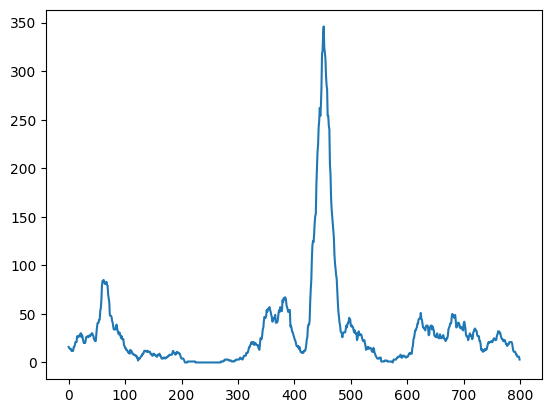

In [11]:
import matplotlib.pyplot as plt
plt.plot(X[:, 5])

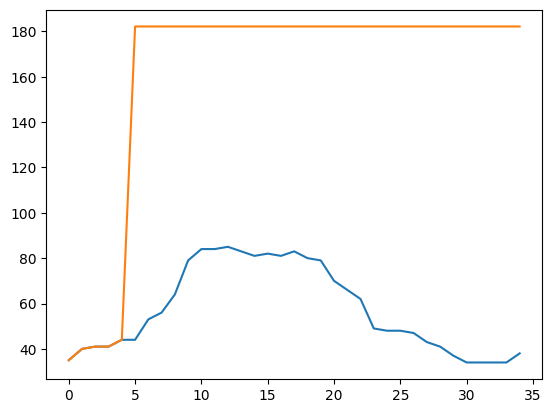

In [72]:
model.eval()
start = 50
n = 30
mine = predict_n(X, 5, start, model, n)
plt.plot(X[start:start+n+model.layers, 5])
plt.plot(mine)

In [73]:

start = 12
model(X[start:start+model.layers, 73].view(model.layers, 1))

tensor([182.1476], grad_fn=<AddBackward0>)

In [76]:
data, y_real = generate_problem(X, 185, 135, batch_size, n)
model(data)

tensor([[161.9568],
        [161.9568],
        [161.9568],
        [161.9568],
        [161.9568]], grad_fn=<AddmmBackward0>)